# Data Wrangling

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest, anderson
import statsmodels.api as sm

## Limpieza de Datos

In [2]:
iar_Reservaciones = pd.read_csv("/Users/fernandalee/Documents/archivos_reto/iar_Reservaciones.csv")

## Eliminación de filas con datos atípicos
iar_Reservaciones = iar_Reservaciones[iar_Reservaciones["aa_h_num_per"] == 0]
iar_Reservaciones = iar_Reservaciones[iar_Reservaciones["h_tfa_total"] >= 0]
iar_Reservaciones = iar_Reservaciones[iar_Reservaciones["h_num_per"] <= 30]
iar_Reservaciones = iar_Reservaciones[iar_Reservaciones["h_num_noc"] <= 200]

Ventas = pd.read_csv("/Users/fernandalee/Documents/archivos_reto/iaab_Detalles_Vtas.csv")
Ventas = Ventas[Ventas["cantidad_ali"] >= 0]
Ventas = Ventas[Ventas["cantidad_beb"] >= 0]


iar_Reservaciones['Fecha_hoy'] = pd.to_datetime(iar_Reservaciones['Fecha_hoy'], errors='coerce')
iar_Reservaciones['Fecha_hoy'] = iar_Reservaciones['Fecha_hoy'].dt.date

## Conversión de moneda a dolar
iar_Reservaciones["h_tfa_total"] = iar_Reservaciones["h_tfa_total"] / 20

## Eliminar columnas innecesarias
iar_Reservaciones = iar_Reservaciones[[col for col in iar_Reservaciones.columns if not col.startswith("aa")]]

/var/folders/8n/8bjdlpfd1fxggmklmx0rdw8w0000gn/T/ipykernel_10660/1030031350.py:1: DtypeWarning: Columns (22,28) have mixed types. Specify dtype option on import or set low_memory=False.
  iar_Reservaciones = pd.read_csv("/Users/fernandalee/Documents/archivos_reto/iar_Reservaciones.csv")


## Búsqueda de columnas ID en otras tablas

In [3]:

folder_path = "/Users/fernandalee/Documents/archivos_reto"

id_columns = [col for col in iar_Reservaciones.columns if col.startswith('ID')]

archivo_columna_matches = {}

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        try:
            df = pd.read_csv(file_path, nrows=5)  
            matches = [col for col in id_columns if col in df.columns]
            if matches:
                archivo_columna_matches[filename] = matches
        except Exception as e:
            print(f"Error leyendo {filename}: {e}")

for archivo, columnas in archivo_columna_matches.items():
    print(f"\nArchivo: {archivo}")
    print(f"Columnas que coinciden: {columnas}")


Error leyendo iaab_Cubiertos_pdia.csv: No columns to parse from file
Error leyendo iaab_Cabez_Status.csv: No columns to parse from file
Error leyendo iaab_Cabez_Status_pan_aa.csv: No columns to parse from file
Error leyendo iaab_Cubiertos_pan2.csv: No columns to parse from file
Error leyendo iaab_Cubiertos_pan.csv: No columns to parse from file
Error leyendo iaab_Cubiertos_pan1.csv: No columns to parse from file
Error leyendo iaab_Cajas.csv: No columns to parse from file
Error leyendo iaab_clasif_hoteles.csv: No columns to parse from file
Error leyendo iaab_Cabez_Status_pdia.csv: No columns to parse from file
Error leyendo iaab_Cubiertos_pdia1.csv: No columns to parse from file
Error leyendo iaab_Cubiertos_pdia2.csv: No columns to parse from file
Error leyendo iaab_Cabez_Status_phis.csv: No columns to parse from file
Error leyendo iaab_Cabez_Status_pan.csv: No columns to parse from file
Error leyendo iaab_Cabez_Status_phis_aa.csv: No columns to parse from file
Error leyendo iaab_Cubier

## Búsqueda de columna ID_Paquete en otras tablas

In [4]:
columna_buscada = 'ID_Paquete'
archivos_con_id_paquete = []

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        try:
            df = pd.read_csv(file_path, nrows=5)  
            if columna_buscada in df.columns:
                archivos_con_id_paquete.append(filename)
        except Exception as e:
            print(f"Error leyendo {filename}: {e}")
if archivos_con_id_paquete:
    print(f"La columna '{columna_buscada}' se encuentra en los siguientes archivos:")
    for archivo in archivos_con_id_paquete:
        print(f"- {archivo}")
else:
    print(f"No se encontró la columna '{columna_buscada}' en los archivos CSV.")

Error leyendo iaab_Cubiertos_pdia.csv: No columns to parse from file
Error leyendo iaab_Cabez_Status.csv: No columns to parse from file
Error leyendo iaab_Cabez_Status_pan_aa.csv: No columns to parse from file
Error leyendo iaab_Cubiertos_pan2.csv: No columns to parse from file
Error leyendo iaab_Cubiertos_pan.csv: No columns to parse from file
Error leyendo iaab_Cubiertos_pan1.csv: No columns to parse from file
Error leyendo iaab_Cajas.csv: No columns to parse from file
Error leyendo iaab_clasif_hoteles.csv: No columns to parse from file
Error leyendo iaab_Cabez_Status_pdia.csv: No columns to parse from file
Error leyendo iaab_Cubiertos_pdia1.csv: No columns to parse from file
Error leyendo iaab_Cubiertos_pdia2.csv: No columns to parse from file
Error leyendo iaab_Cabez_Status_phis.csv: No columns to parse from file
Error leyendo iaab_Cabez_Status_pan.csv: No columns to parse from file
Error leyendo iaab_Cabez_Status_phis_aa.csv: No columns to parse from file
Error leyendo iaab_Cubier

Mediante las siguientes búsquedas, se nos permitió poder encontrar la ubicación de columnas de nuestro interés, para después unirlas en un sólo dataset.  

## Integración de tablas para Reservaciones

### Agencias

In [5]:
iar_Agencias = pd.read_csv("/Users/fernandalee/Documents/archivos_reto/iar_Agencias.csv")
iar_Agencias.columns
iar_Reservaciones = iar_Reservaciones.merge(
    iar_Agencias[['ID_Agencia', 'Hotel_cve', 'Agencia_nombre', 'Estado_cve']],
    on='ID_Agencia',
    how='left'
)


### Tipos de Habitación

In [6]:
iar_Tipos_Habitaciones = pd.read_csv("/Users/fernandalee/Documents/archivos_reto/iar_Tipos_Habitaciones.csv")
iar_Tipos_Habitaciones.columns
iar_Reservaciones = iar_Reservaciones.merge(
    iar_Tipos_Habitaciones[['ID_Tipo_Habitacion', 'Tipo_Habitacion_nombre', 'Clasificacion']],
    on='ID_Tipo_Habitacion',
    how='left'
)

### Empresas

In [7]:
iar_empresas = pd.read_csv("/Users/fernandalee/Documents/archivos_reto/iar_empresas.csv")
iar_empresas.columns
iar_Reservaciones = iar_Reservaciones.merge(
    iar_empresas[['ID_empresa', 'Empresa_nombre', 'Franquicia']],
    on='ID_empresa',
    how='left'
)

### Paquetes

In [8]:
iar_paquetes = pd.read_csv("/Users/fernandalee/Documents/archivos_reto/iar_paquetes.csv")
iar_paquetes.columns
iar_Reservaciones = iar_Reservaciones.merge(
    iar_paquetes[['ID_paquete', 'Paquete_nombre']],
    left_on='ID_Paquete',
    right_on='ID_paquete',
    how='left'
)
iar_Reservaciones.drop(columns=['ID_paquete'], inplace=True)



In [9]:
iar_Reservaciones.head()

,ID_Reserva,Fecha_hoy,h_res_fec,h_res_fec_ok,h_res_fec_okt,h_num_per,h_num_adu,h_num_men,h_num_noc,h_tot_hab,...,h_ult_cam_fec_ok,h_ult_cam_fec_okt,Hotel_cve,Agencia_nombre,Estado_cve,Tipo_Habitacion_nombre,Clasificacion,Empresa_nombre,Franquicia,Paquete_nombre
0,0,2019-08-16,20190816,2019-08-16,2019-08-16 00:00:00.000,2,2,0,3,1,...,2019-11-10,2019-11-10 00:00:00.000,AZU,HOTELES S.A.,EMX,ESTD 2Q SN12MST,MST,HOTEL 1,OPERADO,WALK IN ...
1,1,2019-10-22,20191022,2019-10-22,2019-10-22 00:00:00.000,4,4,0,4,1,...,2019-12-05,2019-12-05 00:00:00.000,AZU,HOTELES S.A.,EMX,ESTD 2Q SN12MST,MST,HOTEL 1,OPERADO,NINGUNO ...
2,2,2019-10-28,20191028,2019-10-28,2019-10-28 00:00:00.000,2,2,0,4,1,...,2019-12-05,2019-12-05 00:00:00.000,AZU,HOTELES S.A.,EMX,JR SUITE 1K SN12MJS,MJS,HOTEL 1,OPERADO,WALK IN ...
3,3,2019-10-28,20191028,2019-10-28,2019-10-28 00:00:00.000,4,3,0,3,1,...,2019-12-11,2019-12-11 00:00:00.000,AZU,HOTELES S.A.,EMX,JR SUITE 2Q SN12MJS,MJS,HOTEL 1,OPERADO,NINGUNO ...
4,4,2019-10-28,20191028,2019-10-28,2019-10-28 00:00:00.000,2,2,0,4,1,...,2019-12-12,2019-12-12 00:00:00.000,AZU,BESTDAY TRAVEL GROUP ...,EQR,LUXURY 2Q SN12GSU,GSU,HOTEL 1,OPERADO,WALK IN ...


### Eliminación de las columnas que no dan relevancia

In [10]:
Reservaciones = iar_Reservaciones.drop(columns=['h_res_fec', 'h_res_fec_ok', 'h_res_fec_okt', 'ID_Programa','ID_Paquete','ID_Segmento_Comp','ID_canal','h_fec_lld','h_fec_lld_ok','h_fec_lld_okt','h_fec_reg','h_fec_reg_ok','h_fec_reg_okt','h_fec_sda','Reservacion','h_fec_sda_ok','h_fec_sda_okt','Cliente_Disp','ID_empresa','ID_estatus_reservaciones','ID_Agencia','h_can_res','h_cod_reserva','h_codigop','h_correo_e','h_nom','h_ult_cam_fec','h_ult_cam_fec_ok','h_ult_cam_fec_okt'])

## Integración de Tablas para Ventas

In [11]:
Ventas.head()

,ID_Detalle_vta,fecha_hoy,caja_cve,turno_cve,ID_status,fec_com,hora_alta,folio,mesero,id_operador,...,ID_empresa,ID_Map_tipo_bebyali,impto,aa_impto,Total_Sin_Impuestos,aa_total_s_impto,moneda_cve,ID_tipo_venta,ID_map_status,ID_tipo_cheque
0,223675,2018-09-26 00:00:00.000,1,1,1,20180926,92400,12615,AL0,329,...,3,1,1,0,5.118750,0,2,0,2,1
1,223676,2018-09-26 00:00:00.000,1,1,1,20180926,92400,12615,AL0,329,...,3,1,1,0,7.543125,0,2,0,2,1
2,223677,2018-09-26 00:00:00.000,1,1,1,20180926,102900,12624,AL0,329,...,3,1,1,0,23.437500,0,2,0,2,2
3,223678,2018-09-26 00:00:00.000,1,1,1,20180926,102900,12624,AL0,329,...,3,1,1,0,5.118750,0,2,0,2,2
4,223679,2018-09-26 00:00:00.000,1,1,2,20180926,102900,12624,AL0,329,...,3,1,1,0,-5.711250,0,2,0,2,2


In [12]:
Ventas = Ventas[["fecha_hoy", "platillo_cve","HORA_MIN_SEG", "cantidad_ali", "cantidad_beb", "importe", "ID_empresa"]]
iar_empresas = pd.read_csv("/Users/fernandalee/Documents/archivos_reto/iar_Empresas.csv")

In [13]:
Ventas.head()

,fecha_hoy,platillo_cve,HORA_MIN_SEG,cantidad_ali,cantidad_beb,importe,ID_empresa
0,2018-09-26 00:00:00.000,DES026,92400,1.0,0.0,5.118534,3
1,2018-09-26 00:00:00.000,POS005,92400,2.0,0.0,7.543103,3
2,2018-09-26 00:00:00.000,DES002,102900,3.0,0.0,23.437500,3
3,2018-09-26 00:00:00.000,DES027,102900,1.0,0.0,5.118534,3
4,2018-09-26 00:00:00.000,DSCALI,102900,0.0,0.0,-5.711207,3


## Empresas

In [14]:
Ventas = Ventas.merge(
    iar_empresas[["ID_empresa", "Empresa_nombre"]],
    left_on="ID_empresa",     # columna en Ventas
    right_on="ID_empresa",    # columna en iar_empresas
    how="left"
)

In [15]:
## Pasar a formato datetime
Ventas['fecha_hoy'] = pd.to_datetime(Ventas['fecha_hoy'], errors='coerce')
Ventas['fecha_hoy'] = Ventas['fecha_hoy'].dt.date

## Guardar datos


In [16]:
# Reservaciones.to_csv("Reservaciones.csv", index=False)
# Ventas.to_csv("Ventas.csv", index=False)

## Verificación de tipos de datos

In [17]:
print(Reservaciones.dtypes)

ID_Reserva                  int64
Fecha_hoy                  object
h_num_per                   int64
h_num_adu                   int64
h_num_men                   int64
h_num_noc                   int64
h_tot_hab                   int64
ID_Tipo_Habitacion          int64
ID_Pais_Origen              int64
h_edo                      object
h_tfa_total               float64
moneda_cve                  int64
Hotel_cve                  object
Agencia_nombre             object
Estado_cve                 object
Tipo_Habitacion_nombre     object
Clasificacion              object
Empresa_nombre             object
Franquicia                 object
Paquete_nombre             object
dtype: object


In [18]:
print(Ventas.dtypes)

fecha_hoy          object
platillo_cve       object
HORA_MIN_SEG        int64
cantidad_ali      float64
cantidad_beb      float64
importe           float64
ID_empresa          int64
Empresa_nombre     object
dtype: object


## Corrección de tipos de datos

In [19]:
Ventas["cantidad_ali"] = Ventas["cantidad_ali"].astype(int)
Ventas["cantidad_beb"] = Ventas["cantidad_beb"].astype(int)

## Visualización de variables numéricas

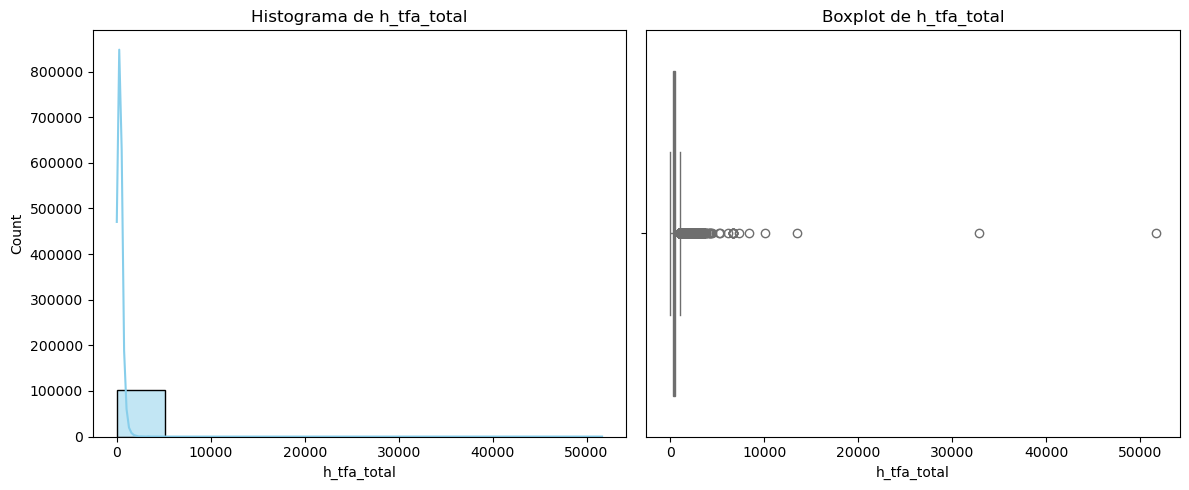

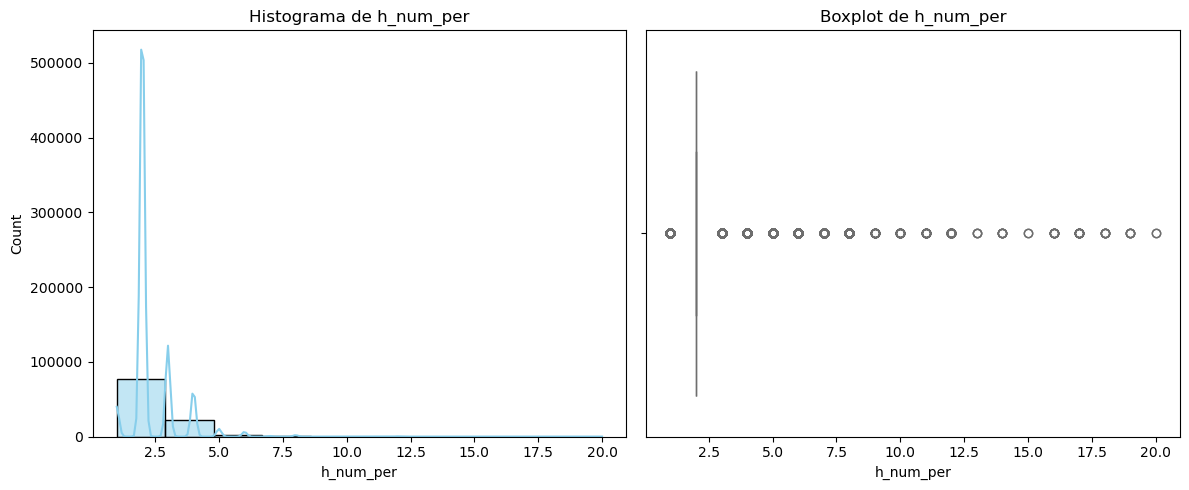

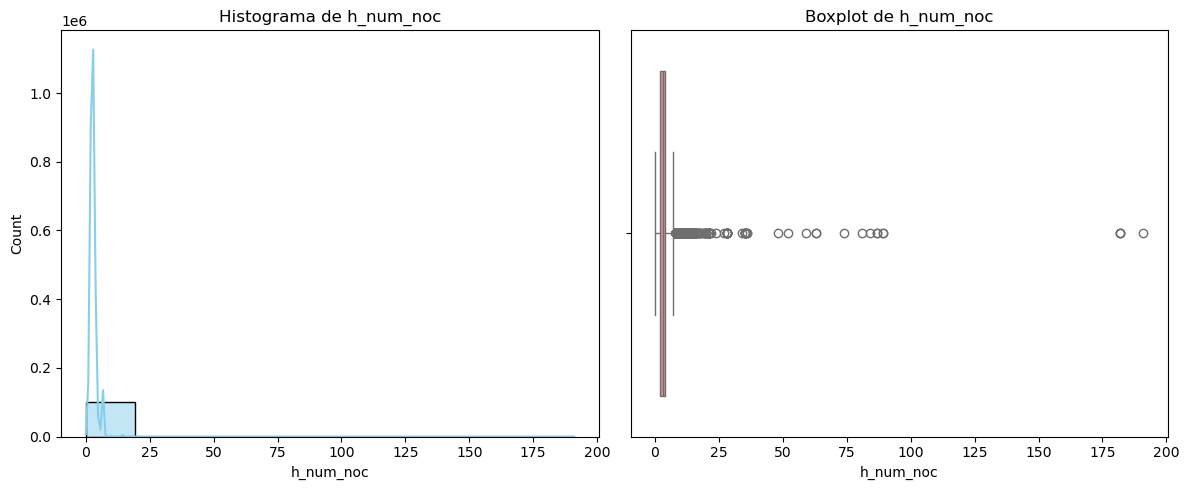

In [20]:


columnas_numericas = ['h_tfa_total', 'h_num_per', 'h_num_noc']

for col in columnas_numericas:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(Reservaciones[col], kde=True, bins=10, color='skyblue')
    plt.title(f'Histograma de {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=Reservaciones[col], color='lightcoral')
    plt.title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.show()


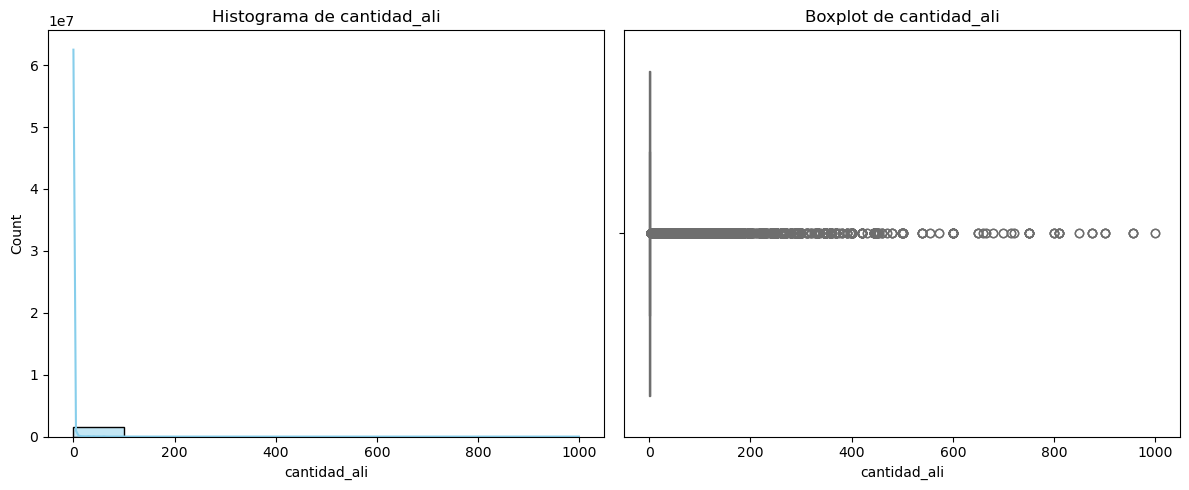

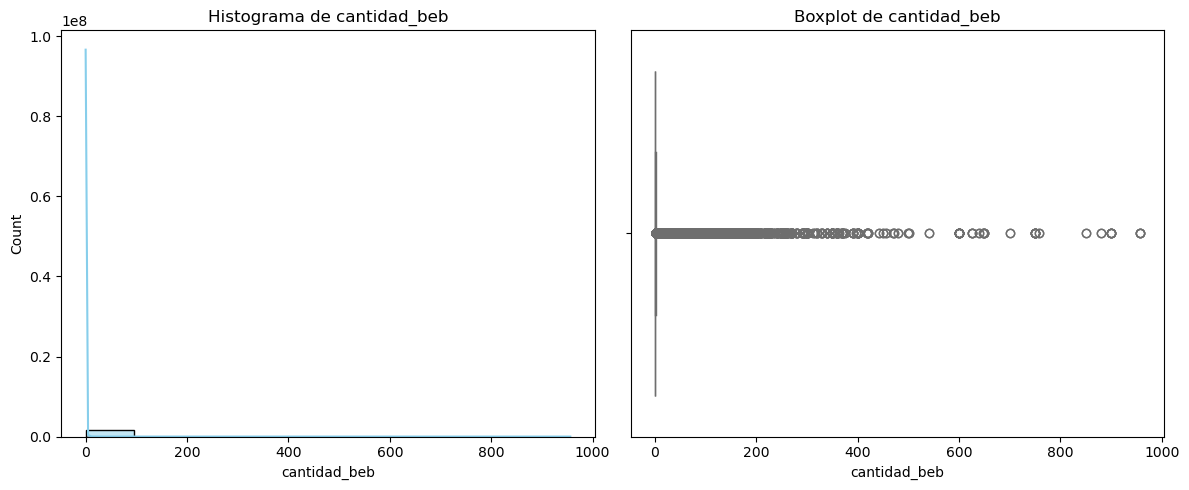

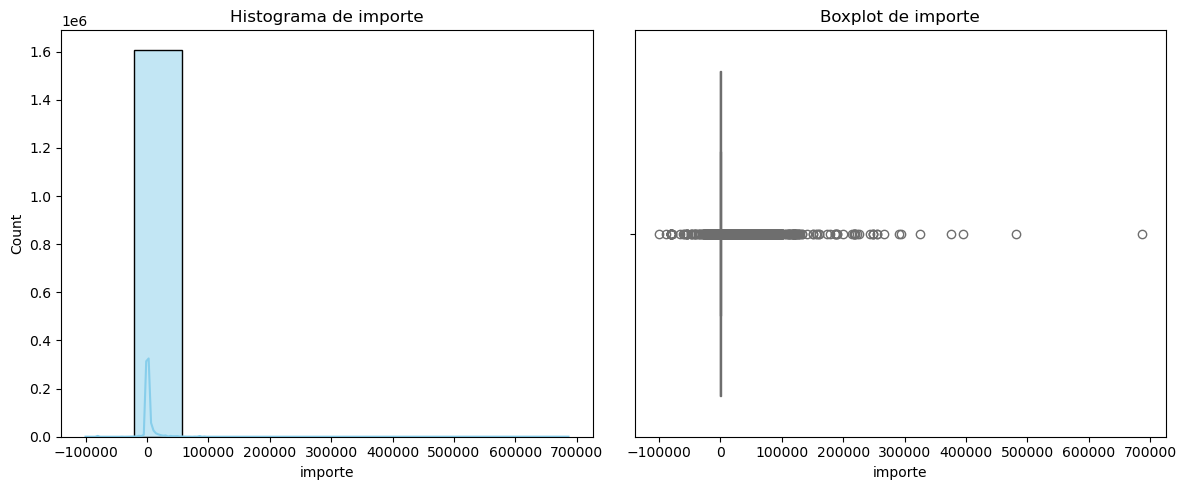

In [21]:
columnas_numericas = ['cantidad_ali', 'cantidad_beb', 'importe']

for col in columnas_numericas:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(Ventas[col], kde=True, bins=10, color='skyblue')
    plt.title(f'Histograma de {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=Ventas[col], color='lightcoral')
    plt.title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.show()


## Visualización de la frecuencia de variables categóricas

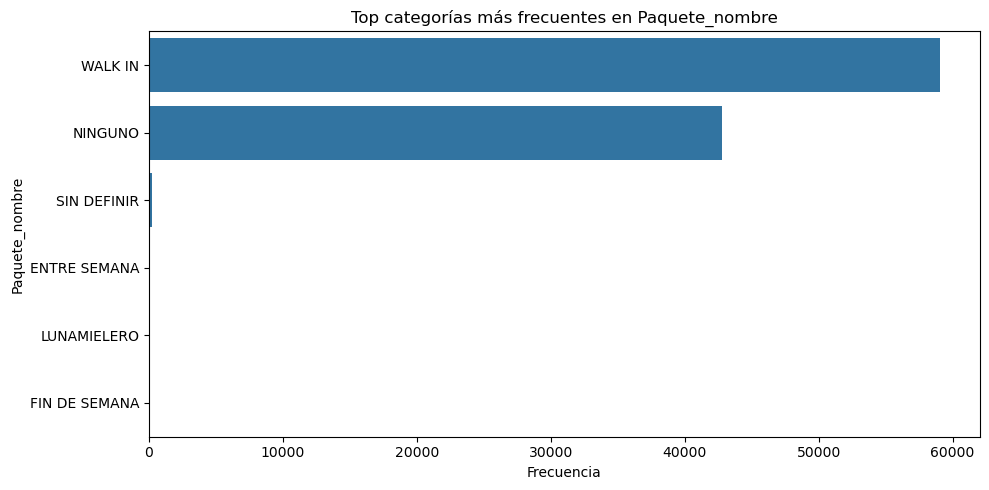

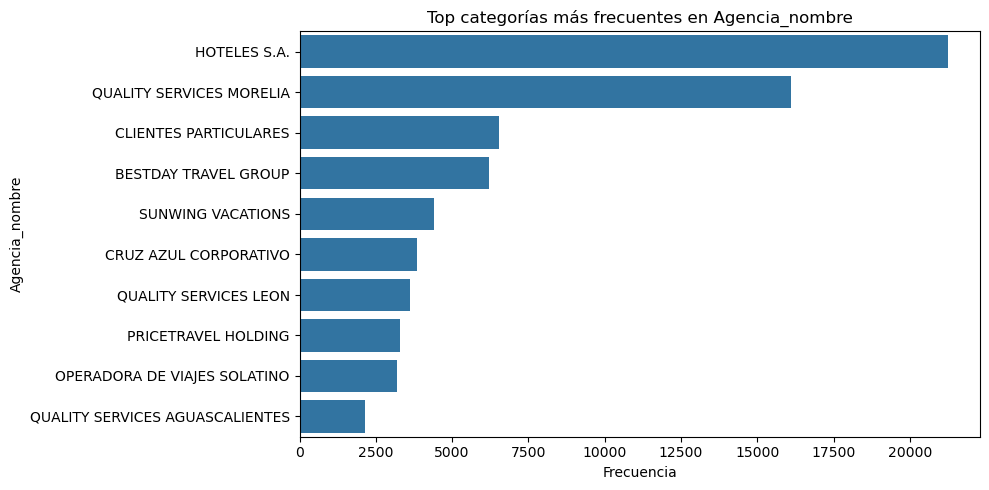

In [22]:
variables_categoricas = ['Paquete_nombre',  'Agencia_nombre']

for col in variables_categoricas:
    plt.figure(figsize=(10, 5))
    Reservaciones[col] = Reservaciones[col].astype(str).str.strip().str.upper()
    sns.countplot(y=Reservaciones[col], order=Reservaciones[col].value_counts().index[:10])
    plt.title(f'Top categorías más frecuentes en {col}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


## Valores imposibles

Se identificaron y filtraron valores imposibles en el conjunto de datos, considerando las siguientes reglas de validación lógica:

- **Variables de conteo de personas o habitaciones** (`h_num_per`, `h_num_adu`, `h_num_men`, `h_num_noc`, `h_tot_hab`, y sus duplicados `aa_*`):
  - No pueden ser negativos.
  - Se espera que el número total de personas (`h_num_per`) sea al menos la suma de adultos y menores.
  - El número de noches (`h_num_noc`) debe ser positivo.

- **Montos económicos (`h_tfa_total`)**:
  - No se aceptan valores negativos en tarifas.

- **ID de referencia (`ID_*`)**:
  - No deben ser negativos. Aunque pueden ser cero si representan "sin asignar".

- **Campos booleanos o binarios (`Cliente_Disp`, `aa_Cliente_Disp`, `Reservacion`)**:
  - Deben tener valores en {0, 1}. Se filtraron valores distintos.

- **Fechas (`*_fec_*`)**:
  - Se eliminaron fechas imposibles (año menor a 1900 o mayor a 2100).


## Corrección de Outliers

Se detectaron outliers en las siguientes variables:

- `h_tfa_total` (141 outliers): distribución no normal (Shapiro-Wilk p=0.0000).
- `h_num_per` (706 outliers): distribución no normal (p=0.0000).
- `h_num_noc` (139 outliers): distribución no normal (p=0.0000).

Debido a la **no normalidad** de la mayoría de las variables, se utilizó el método de IQR para detectar y corregir outliers. Los valores fuera de los límites (Q1 - 1.5×IQR, Q3 + 1.5×IQR) fueron truncados (winsorized) al percentil más alto/límite permitido para evitar distorsión en análisis posteriores sin perder filas.

La advertencia de `scipy.stats.shapiro` indicando “range zero” se presenta cuando todos los valores de una variable son idénticos, por lo que no se puede evaluar su distribución. En este caso, simplemente se descarta el test y se trata como dato constante.


In [23]:
import numpy as np

## QQ Plots y pruebas de normalidad

[Normaltest] h_tfa_total: stat=295482.6171, p-value=0.0000e+00
[Anderson-Darling] h_tfa_total: stat=3504.8405
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]


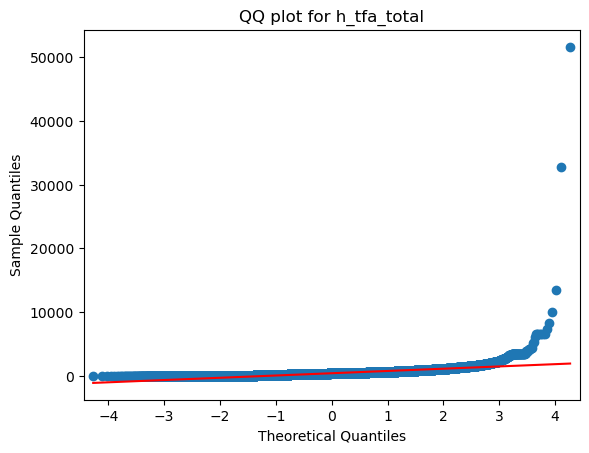

[Normaltest] h_num_per: stat=89307.7766, p-value=0.0000e+00
[Anderson-Darling] h_num_per: stat=15197.2008
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]


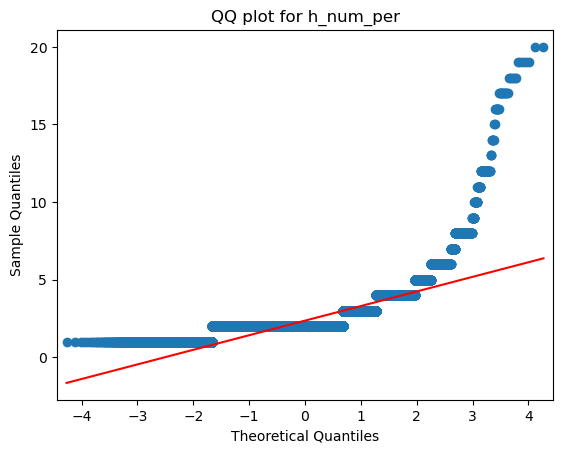

[Normaltest] h_num_noc: stat=247416.3308, p-value=0.0000e+00
[Anderson-Darling] h_num_noc: stat=9188.5715
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]


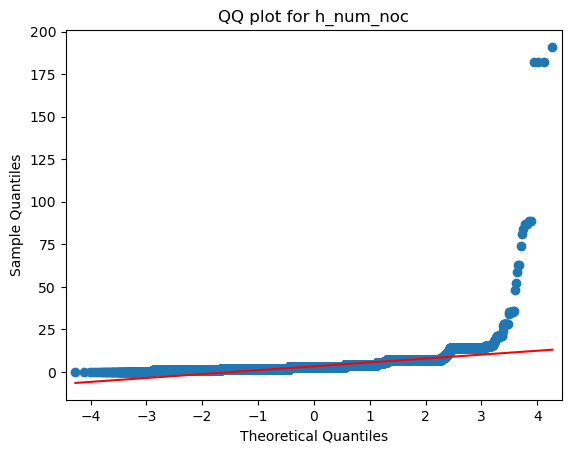

In [24]:


columnas = ['h_tfa_total', 'h_num_per', 'h_num_noc']

for col in columnas:
    data = Reservaciones[col]

    # D’Agostino-Pearson Test
    k2_stat, p_norm = normaltest(data)
    print(f"[Normaltest] {col}: stat={k2_stat:.4f}, p-value={p_norm:.4e}")

    # Anderson-Darling Test
    ad_result = anderson(data, dist='norm')
    print(f"[Anderson-Darling] {col}: stat={ad_result.statistic:.4f}")
    print("Critical values:", ad_result.critical_values)
    print("Significance levels:", ad_result.significance_level)

    # QQ plot
    sm.qqplot(data, line='s')
    plt.title(f"QQ plot for {col}")
    plt.show()


Al tener valores de p-value < 0 indica a que se rechaza la hipótesis nula de que los datos poseen normalidad alguna.

[Normaltest] cantidad_ali: stat=4524991.2048, p-value=0.0000e+00
[Anderson-Darling] cantidad_ali: stat=492869.7921
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]


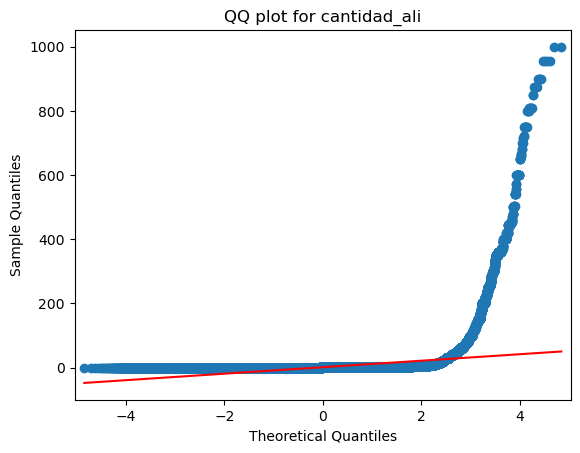

[Normaltest] cantidad_beb: stat=5176210.8794, p-value=0.0000e+00
[Anderson-Darling] cantidad_beb: stat=496575.2888
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]


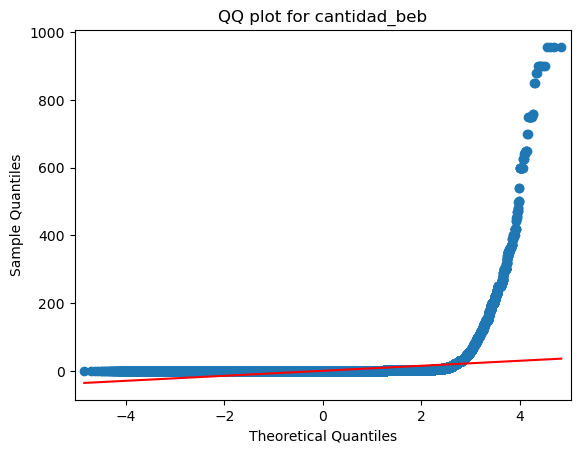

[Normaltest] importe: stat=5905010.8492, p-value=0.0000e+00
[Anderson-Darling] importe: stat=511297.8641
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]


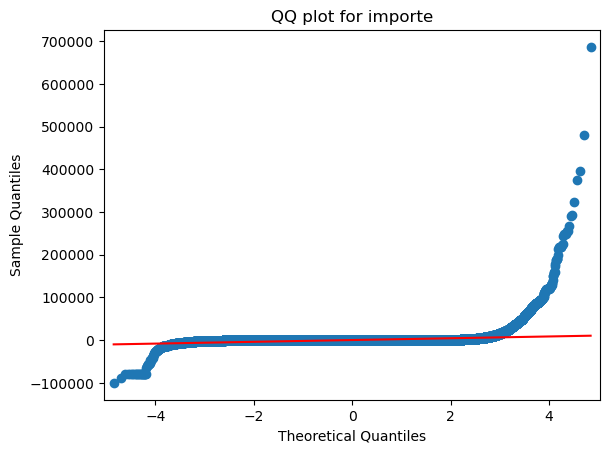

In [25]:

columnas = ['cantidad_ali', 'cantidad_beb', 'importe']

for col in columnas:
    data = Ventas[col]

    # D’Agostino-Pearson Test
    k2_stat, p_norm = normaltest(data)
    print(f"[Normaltest] {col}: stat={k2_stat:.4f}, p-value={p_norm:.4e}")

    # Anderson-Darling Test
    ad_result = anderson(data, dist='norm')
    print(f"[Anderson-Darling] {col}: stat={ad_result.statistic:.4f}")
    print("Critical values:", ad_result.critical_values)
    print("Significance levels:", ad_result.significance_level)

    # QQ plot
    sm.qqplot(data, line='s')
    plt.title(f"QQ plot for {col}")
    plt.show()

También estos valores obtuvieron un p-value < 0, por lo que se rechaza la hipótesis nula de que los datos poseen normalidad alguna.

## Identificación de Valores Categóricos

### Reservaciones

In [26]:
cat_cols = []# Esta es una lista donde guardaremos las columnas categóricas

cat_cols += list(Reservaciones.select_dtypes(include='object').columns)

# También consideraremos columnas tipo int64 
n_rows = len(Reservaciones)
for col in Reservaciones.select_dtypes(include='int64').columns:
    if Reservaciones[col].nunique() <= n_rows * 0.05:
        cat_cols.append(col)

cat_cols = list(set(cat_cols))  # eliminar duplicados

print("Columnas categóricas identificadas:")
print(cat_cols)


Columnas categóricas identificadas:
['h_tot_hab', 'Franquicia', 'Clasificacion', 'h_num_per', 'Hotel_cve', 'h_num_noc', 'Agencia_nombre', 'h_edo', 'h_num_adu', 'moneda_cve', 'Empresa_nombre', 'ID_Pais_Origen', 'Estado_cve', 'Paquete_nombre', 'Fecha_hoy', 'ID_Tipo_Habitacion', 'Tipo_Habitacion_nombre', 'h_num_men']


### Ventas

In [27]:
cat_cols = []

cat_cols += list(Ventas.select_dtypes(include='object').columns)

n_rows = len(Ventas)
for col in Ventas.select_dtypes(include='int64').columns:
    if Ventas[col].nunique() <= n_rows * 0.05:
        cat_cols.append(col)

cat_cols = list(set(cat_cols))  # eliminar duplicados

print("Columnas categóricas identificadas:")
print(cat_cols)


Columnas categóricas identificadas:
['ID_empresa', 'cantidad_ali', 'cantidad_beb', 'HORA_MIN_SEG', 'Empresa_nombre', 'fecha_hoy', 'platillo_cve']


In [28]:
Reservaciones.shape

(102154, 20)

In [29]:
Ventas.shape

(1608260, 8)

In [ ]:
#Ventas.to_csv("/Users/fernandalee/Documents/archivos_reto/Ventas.csv", index=False)
#Reservaciones.to_csv("/Users/fernandalee/Documents/archivos_reto/Reservaciones.csv", index=False)